In [1]:
import pandas as pd
import  numpy as np

In [2]:
dataf = pd.read_csv('mammographic_masses.data.txt', names = ['BI_RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], na_values='?')
dataf.head(9)

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1


In [3]:
dataf.describe()

,BI_RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [4]:
dataf.loc[(dataf['Age'].isnull()) |
              (dataf['Shape'].isnull()) |
              (dataf['Margin'].isnull()) |
              (dataf['Density'].isnull())]

,BI_RADS,Age,Shape,Margin,Density,Severity
1,4.0,43.0,1.0,1.0,NaN,1
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
...,...,...,...,...,...,...
778,4.0,60.0,NaN,4.0,3.0,0
819,4.0,35.0,3.0,NaN,2.0,0
824,6.0,40.0,NaN,3.0,4.0,1
884,5.0,NaN,4.0,4.0,3.0,1


In [5]:
dataf.dropna(inplace=True)
dataf.head()

,BI_RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
10,5.0,76.0,1.0,4.0,3.0,1


In [6]:
X = dataf[['Age', 'Shape','Margin', 'Density']].values
feature_names = ['Age', 'Shape', 'Margin', 'Density']
y = dataf['Severity'].values

X


array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [8]:
# Decision Tree

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.25)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

C:\Users\SURYA\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


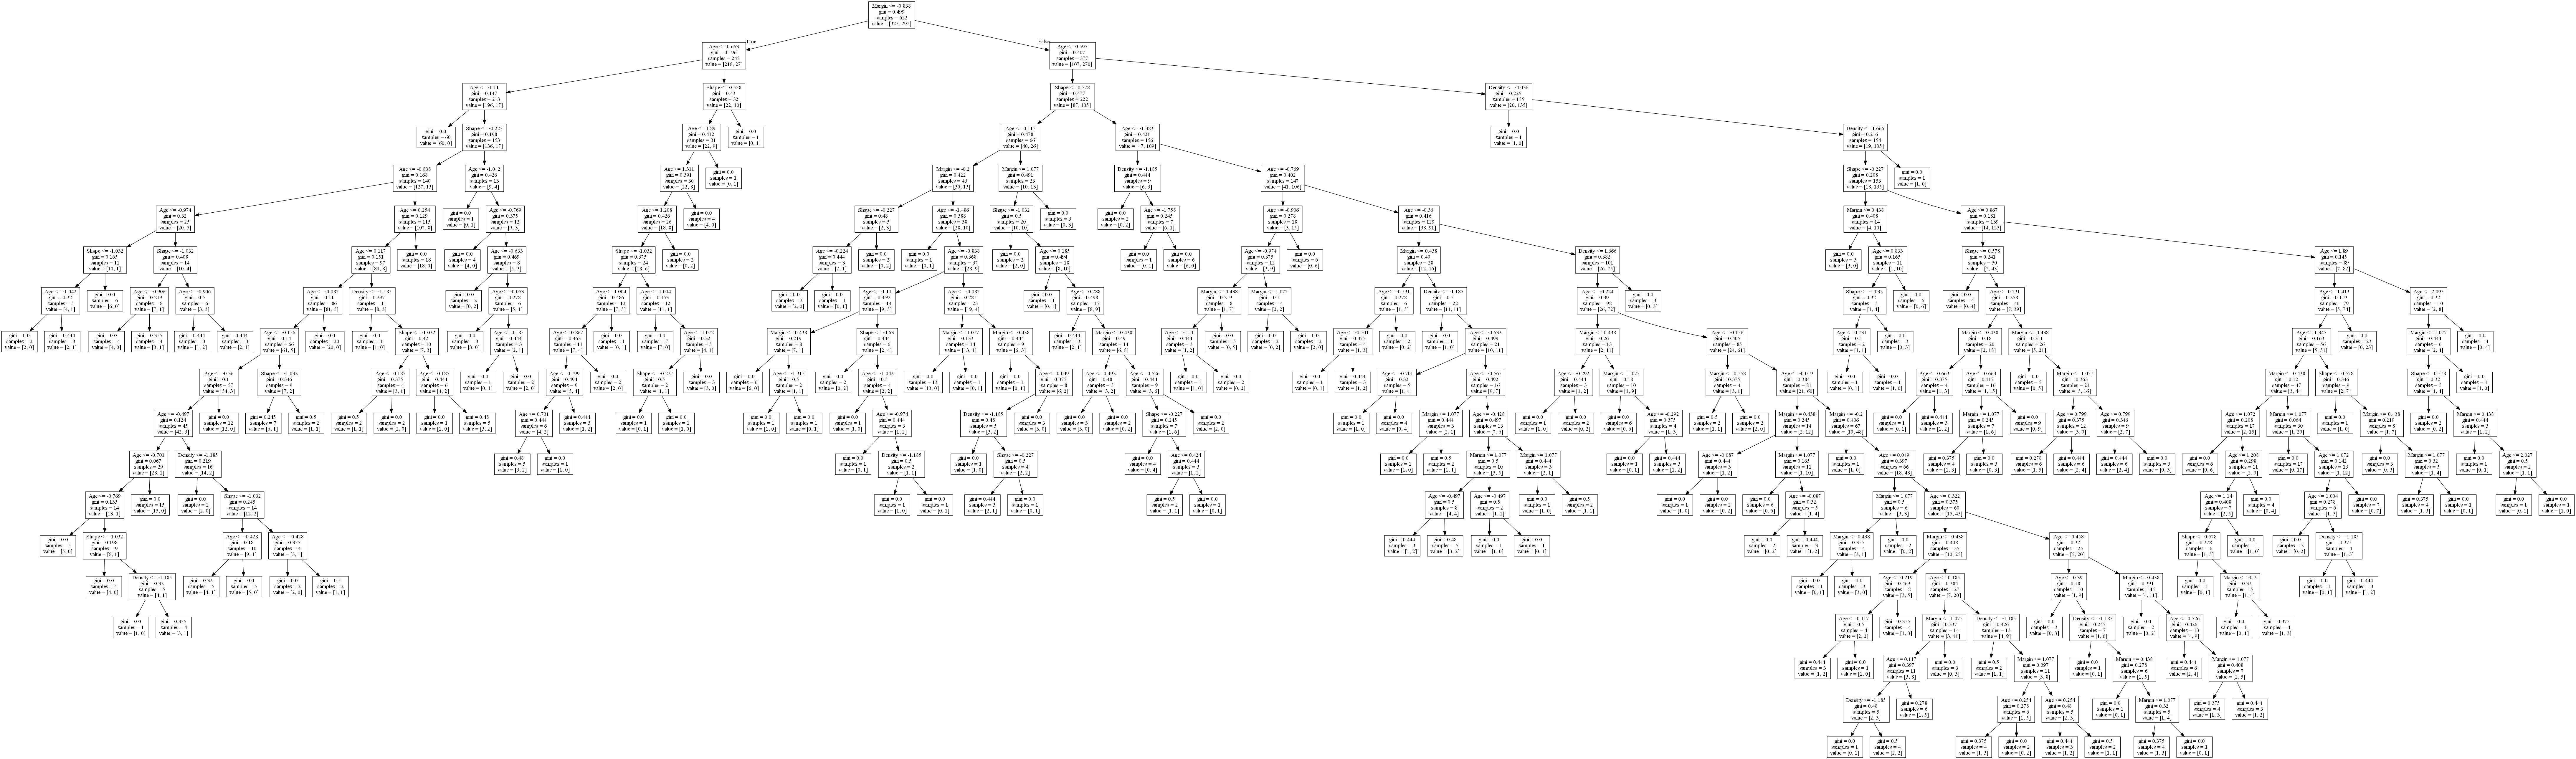

In [9]:
#Output of Decision Tree

from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

In [10]:
#Accuracy
clf.score(X_test, y_test)

0.7596153846153846

In [11]:
#Using K Fold Cross Validation

from sklearn.model_selection import cross_val_score
crossval = cross_val_score(clf, X, y, cv=10)
crossval.mean()

0.7397590361445782

In [12]:
#Making Random Forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
crossval = cross_val_score(clf, X,y,cv=10)
crossval.mean()


0.7614457831325302

In [13]:
#SVM

from sklearn import svm
C = 1.0
clf=svm.SVC(kernel='linear', C=C).fit(X,y)

In [14]:
crossval = cross_val_score(clf, X,y,cv=10)
crossval.mean()

0.7987951807228917

In [15]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X, y)
crossval = cross_val_score(clf, X,y,cv=10)
crossval.mean()


0.7734939759036145

In [18]:
# In loop to find Best K Value
for i in range(1,51):
    clf = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(clf, X, y, cv=10)
    print (i, cv_scores.mean())
    

1 0.7397590361445783
2 0.6927710843373494
3 0.7662650602409637
4 0.7457831325301205
5 0.7891566265060241
6 0.7831325301204818
7 0.7927710843373494
8 0.7795180722891566
9 0.7807228915662651
10 0.7734939759036145
11 0.7746987951807228
12 0.7807228915662651
13 0.7783132530120482
14 0.7746987951807229
15 0.7819277108433734
16 0.7698795180722892
17 0.7843373493975904
18 0.7734939759036145
19 0.783132530120482
20 0.7879518072289157
21 0.7843373493975904
22 0.783132530120482
23 0.7795180722891566
24 0.7783132530120482
25 0.7831325301204819
26 0.7855421686746988
27 0.780722891566265
28 0.7771084337349398
29 0.7734939759036144
30 0.7783132530120481
31 0.7807228915662651
32 0.7759036144578313
33 0.7783132530120482
34 0.7771084337349398
35 0.7795180722891566
36 0.7819277108433733
37 0.7795180722891566
38 0.7819277108433733
39 0.7795180722891566
40 0.7807228915662651
41 0.780722891566265
42 0.7819277108433734
43 0.780722891566265
44 0.7795180722891566
45 0.7783132530120482
46 0.7746987951807229
47

In [19]:
print("Best K value for this model is:7")

Best K value for this model is:7


In [20]:
#Using Naive Bayes

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_minmax = scaler.fit_transform(X)

clf = MultinomialNB()
cv_scores = cross_val_score(clf, X, y, cv=10)

cv_scores.mean()

0.7590361445783133

In [21]:
# Using Logistic Regression

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)


0.808433734939759

In [22]:
# Using Keras Neural Network

from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [23]:
def createmodel():
    model = Sequential()
    model.add(Dense(6, input_dim=4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [25]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

estimator = KerasClassifier(build_fn=createmodel, epochs=100, verbose=0)
cv_scores = cross_val_score(estimator, X, y, cv=10)
cv_scores.mean()


0.7891566216945648

In [27]:
print("Best algorithm for this model is Logistic Regression for predicting whether it is Benign or Malignant of Cancer")

Best algorithm for this model is Logistic Regression for predicting whether it is Benign or Malignant of Cancer
